In [3]:
from analysis.task5 import query_probes_with_identity, get_identities_with_lowest_and_highest_ap_k
from analysis.task1 import add_identities


identified_embeddings = add_identities()

samples = query_probes_with_identity()
worst_performing_identities, best_performing_identities, lowest_map, highest_map = get_identities_with_lowest_and_highest_ap_k(samples)
print(f"Worst Performing Identities (map = {lowest_map}):", worst_performing_identities)
print(f"Best Performing Identities (map = {highest_map}):", best_performing_identities)

worst_performing_identities = set(worst_performing_identities)
best_performing_identities = set(best_performing_identities)


Worst Performing Identities (map = 0): ['Inam-ul-Haq', 'Mark_Cuban', 'Carl_Reiner', 'Demetrius_Ferraciu', 'Max_Mayfield', 'Charles_Schumer', 'David_Wolf', 'Johnny_Depp', 'Jada_Pinkett_Smith', 'Jorge_Batlle', 'Mariah_Carey', 'John_Walsh', 'Claire_Danes', 'Edward_Lu', 'Emile_Lahoud', 'Ernie_Fletcher', 'Mario_Dumont', 'Charlie_Zaa', 'Peter_Arnett', 'Steve_Waugh', 'Warren_Buffett', 'Marcus_Gronholm', 'Thabo_Mbeki', 'Robby_Ginepri', 'Hootie_Johnson', 'Joseph_Ralston', 'Susan_Collins', 'Jon_Gruden', 'Gabriel_Valdes', 'Sean_Astin', 'Jim_Edmonds', 'Lindsey_Graham', 'Butch_Davis', 'Steve_Spurrier', 'Paul_Patton', 'George_Ryan', 'Katie_Harman', 'Daryl_Hannah', 'Felix_Mantilla', 'Kathryn_Bigelow', 'Kosuke_Kitajima', 'Phil_Vassar', 'Maria_Luisa_Mendonca', 'Priscilla_Owen', 'Guillaume_Soro', 'Franz_Beckenbauer', 'James_Franco', 'Beth_Jones', 'John_McEnroe', 'Drew_Barrymore', 'Kirk_Ferentz', 'Laila_Ali', 'Larry_Lindsey', 'Kristanna_Loken', 'Rob_Schneider', 'George_Voinovich', 'Nasser_al-Kidwa', 'Mar

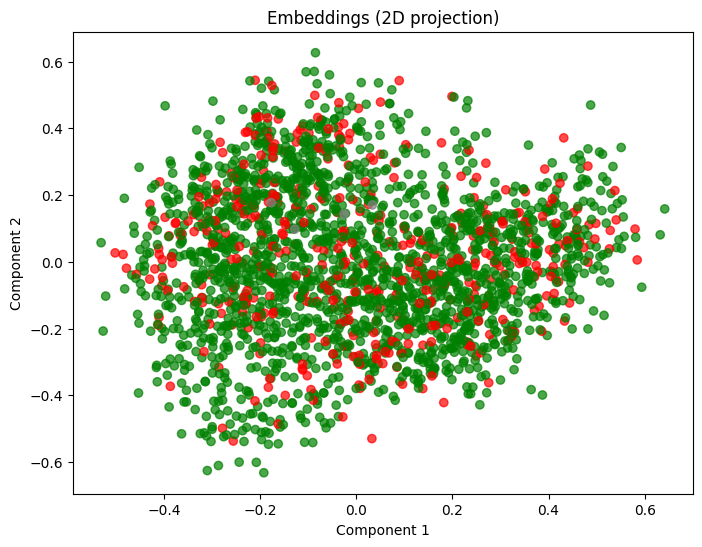

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# or use TSNE for nonlinear structure: from sklearn.manifold import TSNE

# --- Prepare data ---
identities = [id_ for id_, _ in identified_embeddings]
embeddings = np.array([emb for _, emb in identified_embeddings])

# --- Dimensionality reduction (2D) ---
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# --- Assign colors based on identity performance ---
colors = []
for id_ in identities:
    if id_ in worst_performing_identities:
        colors.append("red")
    elif id_ in best_performing_identities:
        colors.append("green")
    else:
        colors.append("gray")

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=colors, alpha=0.7)
plt.title("Embeddings (2D projection)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.show()